In [100]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm # useful stats package with regression functions
import seaborn as sns
import statistics

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.shape
pd.set_option('display.max_columns', 500) #to display all the columns

In [101]:
data[:10]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [102]:
# From datatype: 9 Categorical Data, 26 numerical 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [103]:
#Names of columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [104]:
# To calculate correlation coeffiecient, we extract numerical columms, because there is no order in categorical data.
num_data = data._get_numeric_data()

#Drop EmployeeCount which all the value is 1, StandardHours which all the value is 80
data.EmployeeCount
data.StandardHours
num_data.drop(['EmployeeCount','StandardHours'], axis = 1, inplace = True) #axis = 1 specifies columns

## Investigate correlation among variables

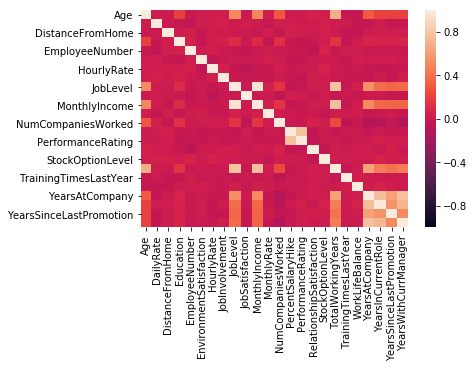

In [105]:
#Create matrix heatmap 
corr = num_data.corr()
sns.heatmap(corr, vmin = -1, vmax = 1)

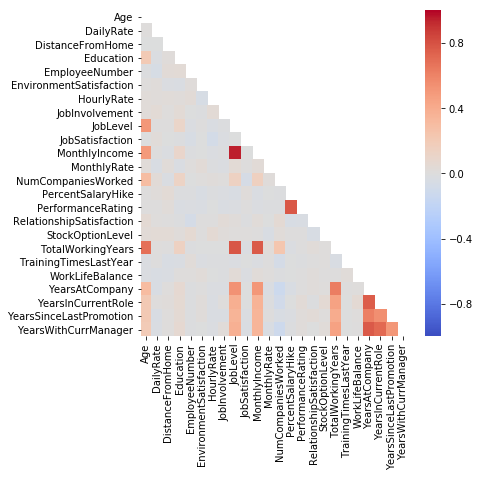

In [106]:
fig, ax = plt.subplots(figsize=(6,6)) 
mask = np.zeros_like(corr) #Return an array of zeros with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True #triu_indices: Return the indices for the upper-triangle of an (n, m) array.
sns.heatmap(corr, vmin = -1, vmax = 1, mask = mask, cmap = 'coolwarm')

### Explore variable: monthly income

Text(0.5,0,'Monthly income (USD)')

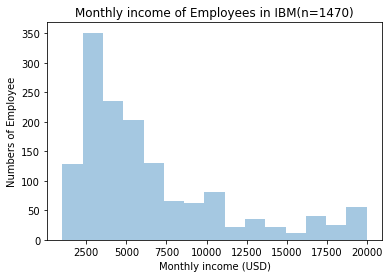

In [11]:
sns.distplot(num_data.MonthlyIncome, kde = False, bins = 15)
plt.title('Monthly income of Employees in IBM(n=1470)')
plt.ylabel('Numbers of Employee')
plt.xlabel('Monthly income (USD)')

In [12]:
#Find the max, min, mean, and median of monthly income
print(num_data.MonthlyIncome.max())
print(num_data.MonthlyIncome.min())
print(num_data.MonthlyIncome.mean())
print(num_data.MonthlyIncome.median())

19999
1009
6502.931292517007
4919.0


### Explore variable: Age data

Text(0.5,0,'Age')

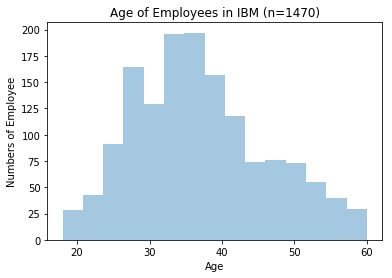

In [13]:
sns.distplot(num_data.Age, kde = False, bins = 15)
plt.title('Age of Employees in IBM (n=1470)')
plt.ylabel('Numbers of Employee')
plt.xlabel('Age')

In [109]:
print('max age '+ str(num_data.Age.max()))
print('min age '+ str(num_data.Age.min()))

max age 60
min age 18


## Relatioship between age and monthly income 

Text(0.5,1,'Monthly income over Age in IBM')

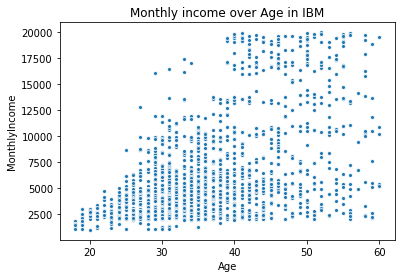

In [15]:
sns.scatterplot(x= 'Age', y = 'MonthlyIncome',data = num_data, s = 15)
plt.title('Monthly income over Age in IBM')

In [16]:
#Correlation between age and other variables 
corr['Age']

Age                         1.000000
DailyRate                   0.010661
DistanceFromHome           -0.001686
Education                   0.208034
EmployeeNumber             -0.010145
EnvironmentSatisfaction     0.010146
HourlyRate                  0.024287
JobInvolvement              0.029820
JobLevel                    0.509604
JobSatisfaction            -0.004892
MonthlyIncome               0.497855
MonthlyRate                 0.028051
NumCompaniesWorked          0.299635
PercentSalaryHike           0.003634
PerformanceRating           0.001904
RelationshipSatisfaction    0.053535
StockOptionLevel            0.037510
TotalWorkingYears           0.680381
TrainingTimesLastYear      -0.019621
WorkLifeBalance            -0.021490
YearsAtCompany              0.311309
YearsInCurrentRole          0.212901
YearsSinceLastPromotion     0.216513
YearsWithCurrManager        0.202089
Name: Age, dtype: float64

In [17]:
#Correlation between monthly income and other variables 
corr['MonthlyIncome']

Age                         0.497855
DailyRate                   0.007707
DistanceFromHome           -0.017014
Education                   0.094961
EmployeeNumber             -0.014829
EnvironmentSatisfaction    -0.006259
HourlyRate                 -0.015794
JobInvolvement             -0.015271
JobLevel                    0.950300
JobSatisfaction            -0.007157
MonthlyIncome               1.000000
MonthlyRate                 0.034814
NumCompaniesWorked          0.149515
PercentSalaryHike          -0.027269
PerformanceRating          -0.017120
RelationshipSatisfaction    0.025873
StockOptionLevel            0.005408
TotalWorkingYears           0.772893
TrainingTimesLastYear      -0.021736
WorkLifeBalance             0.030683
YearsAtCompany              0.514285
YearsInCurrentRole          0.363818
YearsSinceLastPromotion     0.344978
YearsWithCurrManager        0.344079
Name: MonthlyIncome, dtype: float64

In [110]:
#group Age into 5 groups in range
num_data['Age_range'] = num_data['Age'].apply(lambda x: '<20'if x < 20 
                                              else '20-30' if x>=20 and x<30 
                                              else '30-40' if 40>x and x>=30
                                              else '40-50' if 50>x and x>=40
                                              else'50-60' if 60>=x and x>=50 else x)
num_data.sort_values('Age', inplace = True)
demical_per = num_data['Age_range'].value_counts(normalize = True) #normalize Age_range to demical points
percentage = demical_per.astype(float).map(lambda x: '{:.2%}'.format(x)) #transfer
percentage

30-40    42.31%
40-50    23.74%
20-30    21.02%
50-60    11.77%
<20       1.16%
Name: Age_range, dtype: object

In [111]:
#calculate mean, median, and standard deviation and sort them 
mean = num_data.groupby(['Age_range'])['MonthlyIncome'].mean().sort_values() 
median = num_data.groupby(['Age_range'])['MonthlyIncome'].median().sort_values()
std = num_data.groupby(['Age_range'])['MonthlyIncome'].std().sort_values()

#rename for the table
mean.rename('mean', inplace = True)
median.rename('median', inplace = True)
std.rename('standard deviation', inplace = True)
percentage.rename('percentage', inplace = True)

table = pd.concat([round(mean,2), median, round(std,2)], axis=1) #connect all series and round mean and median to 2 digits
table.merge(percentage, left_index = True, right_index = True) #Add percentage into the table too

,mean,median,standard deviation,percentage
<20,1813.06,1675,548.33,1.16%
20-30,3795.74,3102,2034.55,21.02%
30-40,5599.25,4983,3128.11,42.31%
40-50,8537.96,6377,5621.88,23.74%
50-60,10942.91,10725,6005.30,11.77%


Text(0.5,0,'Age')

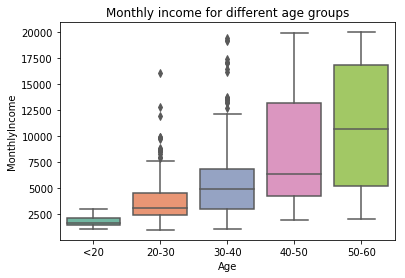

In [130]:
#Create boxplot for different age group
sns.boxplot(x= 'Age_range', y = 'MonthlyIncome',data = num_data, palette="Set2")
plt.title('Monthly income for different age groups')
plt.xlabel('Age')

## Bivariate regression Statistics

In [21]:
x = num_data['Age']
x = sm.add_constant(x)
y = num_data['MonthlyIncome']
model = sm.OLS(y,x).fit()
model.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     483.8
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           6.67e-93
Time:                        18:16:17   Log-Likelihood:                -14308.
No. Observations:                1470   AIC:                         2.862e+04
Df Residuals:                    1468   BIC:                         2.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2970.6712    443.702     -6.695      0.000   -3841.030   -2100.313
Age          256.5716     11.665     21.995      0.000     233.689     279.454
==============================================================================
Omnibus:                      140.178   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.119
Skew:                           0.799   Prob(JB):                     2.84e-40
Kurtosis:                       3.649   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
#double check summary statistics
print(model.rsquared)
print(model.params)

0.24785916980965284
const   -2970.671182
Age       256.571643
dtype: float64


## Bivariate Regression Plot

Text(0.5,1,'The best fitted brvariate regression')

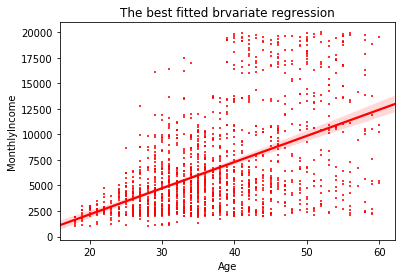

In [129]:
sns.regplot(num_data['Age'], num_data['MonthlyIncome'], fit_reg = True, scatter_kws ={'s': 5}, marker = '+', color = 'r')
plt.title('The best fitted brvariate regression')

In [23]:
slope, intercept, r_value, p_value, std_err = stats.linregress(num_data['Age'], num_data['MonthlyIncome'])
print(slope, intercept, r_value, p_value, std_err)

256.57164298159404 -2970.6711821462322 0.49785456692658053 6.669539202999898e-93 11.665214114482806


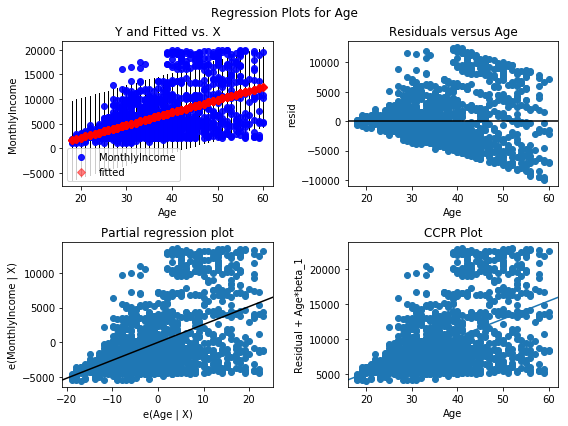

In [118]:
#Create regression, residual plots for the model
sm.OLS(y,x).fit()
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(model,'Age', fig= fig)
plt.show()

# Residual plot 

Text(0.5,0,'Fitted value for Monthly income')

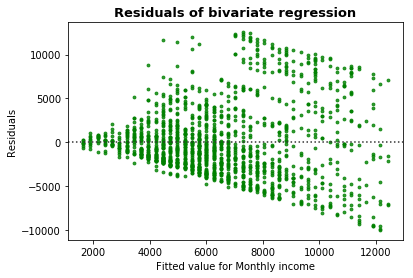

In [26]:
sns.residplot(x= model.predict() , y = model.resid ,data = num_data, scatter_kws={'s':8}, color = 'g')
plt.title('Residuals of bivariate regression', fontweight = 'bold', fontsize = 13)
plt.ylabel('Residuals')
plt.xlabel('Fitted value for Monthly income')

# Residual distribution

Text(0.5,0,'Income')

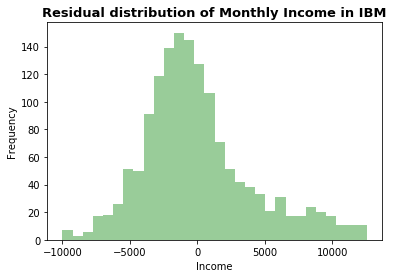

In [127]:
residual = model.resid
sns.distplot(residual, kde = False, color = 'g')
plt.title('Residual distribution of Monthly Income in IBM', fontweight = 'bold', fontsize = 13)
plt.ylabel('Frequency')
plt.xlabel('Income')

# Multiple regression statistics

In [119]:
x = num_data[['Age','TotalWorkingYears', 'JobLevel']]
x = sm.add_constant(x)
y = num_data['MonthlyIncome']
multimodel = sm.OLS(y,x).fit()
multimodel.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     4679.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:43:34   Log-Likelihood:                -12784.
No. Observations:                1470   AIC:                         2.558e+04
Df Residuals:                    1466   BIC:                         2.560e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1621.3075    178.919     -9.062      0.000   -1972.272   -1270.343
Age                  -7.5809      5.655     -1.341      0.180     -18.673       3.511
TotalWorkingYears    52.5431      9.169      5.731      0.000      34.558      70.529
JobLevel           3784.7365     54.895     68.945      0.000    3677.055    3892.418
==============================================================================
Omnibus:                        7.912   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               10.045
Skew:                          -0.051   Prob(JB):                      0.00659
Kurtosis:                       3.392   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Significance test

In [29]:
# t_value = ((slope - (null_hypothesis))/results.bse) #bse = standard error
p_value = stats.t.sf(7.33, multimodel.df_resid)
p_value

1.8943173502434758e-13

# Check multicollinearity

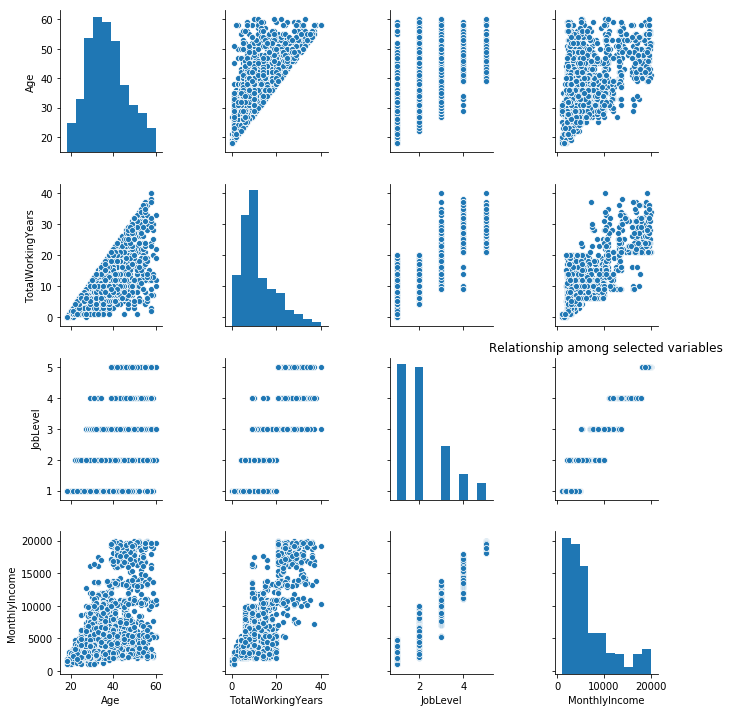

In [126]:
column_x = ['Age','TotalWorkingYears', 'JobLevel']
column_y = ['MonthlyIncome']
columnstoplot = column_x + column_y

sns.pairplot(data[columnstoplot])
plt.tight_layout()
plt.savefig('pairplot.png')
#Total working year cannot exceed age

# Assess the quality for the regression model

## linearity

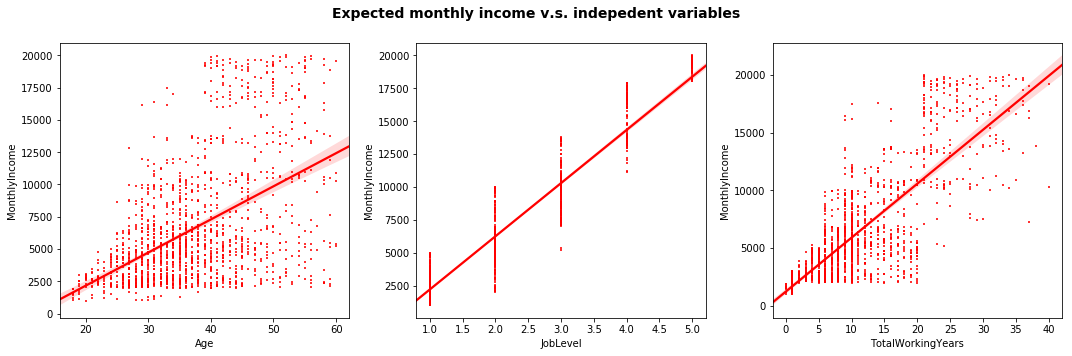

In [123]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
sns.regplot(num_data['Age'], num_data['MonthlyIncome'], fit_reg = True, scatter_kws ={'s': 5}, marker = '+', color = 'r', ax = ax1)
sns.regplot(num_data['JobLevel'], num_data['MonthlyIncome'], fit_reg = True, scatter_kws ={'s': 5}, marker = '+', color = 'r', ax = ax2)
sns.regplot(num_data['TotalWorkingYears'], num_data['MonthlyIncome'], fit_reg = True, scatter_kws ={'s': 5}, marker = '+', color = 'r', ax = ax3)
plt.tight_layout()
fig.suptitle('Expected monthly income v.s. indepedent variables', fontweight='bold',fontsize=14)
plt.subplots_adjust(top=0.88)
plt.savefig('linearity.png')

## Constant variability

Text(0.5,0,'Fitted value for Monthly income')

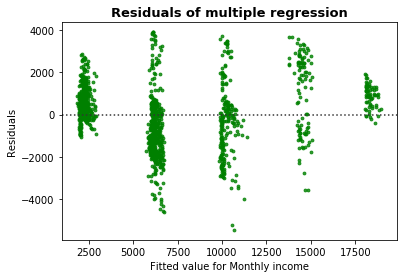

In [58]:
sns.residplot(x= multimodel.predict() , y = multimodel.resid ,data = num_data, scatter_kws={'s':8}, color = 'g')
plt.title('Residuals of multiple regression', fontweight = 'bold', fontsize = 13)
plt.ylabel('Residuals')
plt.xlabel('Fitted value for Monthly income')

## Normality

Text(0.5,0.98,'Normal Probability ("QQ") Plot for Residuals')

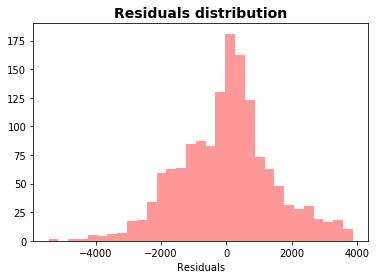

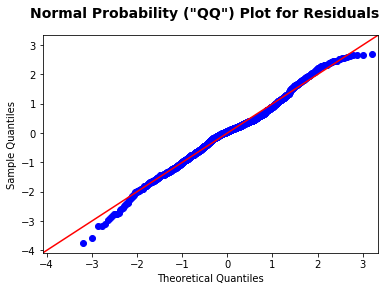

In [121]:
distplot = sns.distplot(multimodel.resid, kde=False, axlabel='Residuals', color='red') #The code is referred from the class
distplot.set_title('Residuals distribution',fontweight='bold',fontsize=14)

qqplot = sm.qqplot(multimodel.resid,fit=True,line='45')
qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

## Indepedence

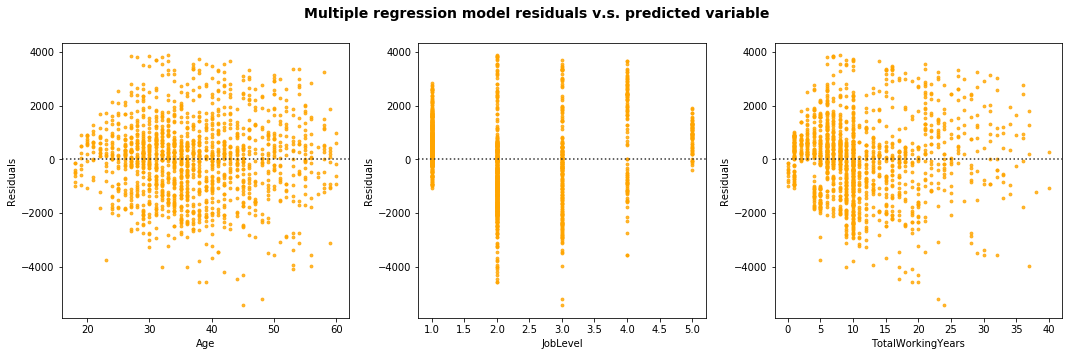

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
sns.residplot(x= num_data.Age , y = multimodel.resid ,data = num_data, scatter_kws={'s':8}, color = 'orange', ax = ax1)
sns.residplot(x= num_data.JobLevel , y = multimodel.resid ,data = num_data, scatter_kws={'s':8}, color = 'orange', ax = ax2)
sns.residplot(x= num_data.TotalWorkingYears , y = multimodel.resid ,data = num_data, scatter_kws={'s':8}, color = 'orange', ax = ax3)

ax1.set_ylabel("Residuals")
ax2.set_ylabel("Residuals")
ax3.set_ylabel("Residuals")
fig.suptitle('Multiple regression model residuals v.s. predicted variable', fontweight='bold',fontsize=14)


plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig('independece.png')

# Others: Regression of different age groups

In [55]:
tenish = num_data[num_data['Age_range'] == '<20']
twienties = num_data[num_data['Age_range'] == '20-30']
thirties = num_data[num_data['Age_range'] == '30-40']
forties = num_data[num_data['Age_range'] == '40-50']
fifties = num_data[num_data['Age_range'] == '50-60']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


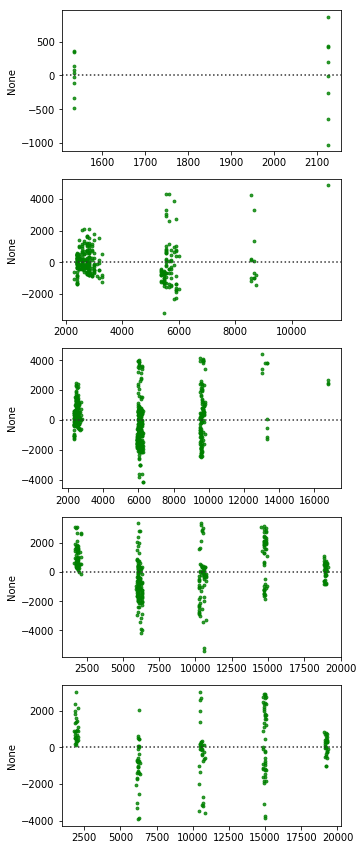

In [32]:
f, axes = plt.subplots(5, 1, figsize=(5, 15))
def residual_age(age_data, i):
    x = age_data[['TotalWorkingYears', 'JobLevel']]
    x = sm.add_constant(x)
    y = age_data['MonthlyIncome']
    mod = sm.OLS(y,x).fit()
    
    pic = sns.residplot(x= mod.predict() , y = mod.resid ,data = num_data, scatter_kws={'s':8}, color = 'g', ax=axes[i])
    
residual_age(tenish, 0)
residual_age(twienties, 1)
residual_age(thirties, 2)
residual_age(forties, 3)
residual_age(fifties, 4)

In [120]:
#5 Job level 
num_data['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64